# Beispiel Anwendung PCA und k Means Clustering

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn import metrics

penguins = pd.read_csv('penguins.csv')
penguins.head()
import warnings
warnings.simplefilter("ignore")

In [93]:
penguins.shape

(344, 5)

## Pengiun Dataset:

Quelle: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

5 Attribute: 
* culmen_length_mm: Schnabelrückenlänge (mm)
* culmen_depth_mm: Schnabelrückentiefe (mm)
* flipper_length_mm: Flossenlänge (mm)
* body_mass_g: Körpergewicht (g)
* sex: Geschlecht

In [94]:
penguins.shape

(344, 5)

In [95]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


[Text(0.5, 1.0, 'Verteilung flipper_length')]

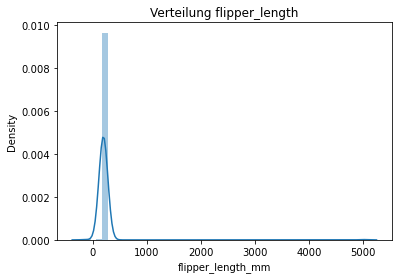

In [97]:
sns.distplot(penguins["flipper_length_mm"]).set(title="Verteilung flipper_length")

In [98]:
def drop_outliers(data, columns):
    for item in columns:
        q1 = data[item].quantile(0.25)
        q3 = data[item].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        upper_array = np.where(data[item]>=upper)[0]
        lower_array = np.where(data[item]<=lower)[0]

        data.drop(index=upper_array, inplace=True)
        data.drop(index=lower_array, inplace=True)
    return data

In [99]:
for col in penguins.columns:
    pct_missing = penguins[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

culmen_length_mm - 2
culmen_depth_mm - 2
flipper_length_mm - 2
body_mass_g - 2
sex - 9


In [100]:
penguins.duplicated().sum()

1

In [102]:
numerical_data = ["body_mass_g", "flipper_length_mm", "culmen_depth_mm", "culmen_length_mm"]
penguins2 = drop_outliers(penguins, numerical_data)
penguins2.shape

(342, 5)

In [103]:
penguins2 = penguins2.dropna()
penguins2.shape

(333, 5)

In [104]:
penguins3 = penguins3.drop_duplicates()
penguins3.shape

(332, 5)

In [105]:
penguins3.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.024096,17.151205,200.099398,4209.412651
std,5.463398,1.968950,23.036141,806.218675
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4050.000000
75%,48.625000,18.700000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


In [107]:
penguins4 = penguins3[(penguins3[numerical_data] >= 0).all(1)]

In [108]:
penguins4.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,331.000000,331.000000,331.000000,331.000000
mean,44.052568,17.139275,201.102719,4208.836858
std,5.446947,1.959877,14.037451,807.370924
min,32.100000,13.100000,172.000000,2700.000000
25%,39.550000,15.600000,190.000000,3550.000000
50%,44.900000,17.300000,197.000000,4050.000000
75%,48.650000,18.650000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


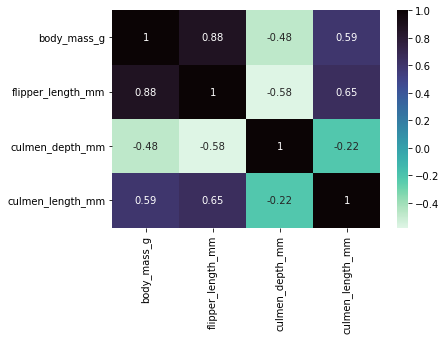

In [109]:
cmap_1=sns.color_palette("mako_r", as_cmap=True)
sns.heatmap(penguins4[numerical_data].corr(), cmap=cmap_1, annot=True)
plt.show()

In [110]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [111]:
penguins4 = dummies('sex',penguins4)

In [112]:
penguins4 = penguins4.drop(["MALE"], axis = 1)
penguins4.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0


In [113]:
sc = StandardScaler()
penguins4[numerical_data] = sc.fit_transform(penguins4[numerical_data])
penguins4.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE
0,-0.910614,0.797544,-1.434246,-0.569170,0
1,-0.837067,0.133233,-1.077516,-0.507147,1
2,-0.689974,0.439838,-0.435404,-1.189402,1
4,-1.351895,1.104149,-0.578095,-0.941309,1
5,-0.873841,1.768460,-0.792133,-0.693217,0


In [114]:
feature_names = penguins4.columns

In [115]:
pca = decomposition.PCA(n_components=3)
pca.fit(penguins4)
penguins4_pca = pca.transform(penguins4)

In [116]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                 for value, name in zip(component, feature_names)))

1 component: 65.09% of initial variance
0.454 x culmen_length_mm + -0.388 x culmen_depth_mm + 0.575 x flipper_length_mm + 0.553 x body_mass_g + -0.080 x FEMALE
2 component: 21.16% of initial variance
0.488 x culmen_length_mm + 0.778 x culmen_depth_mm + -0.008 x flipper_length_mm + 0.098 x body_mass_g + -0.382 x FEMALE
3 component: 9.37% of initial variance
0.729 x culmen_length_mm + -0.233 x culmen_depth_mm + -0.184 x flipper_length_mm + -0.523 x body_mass_g + 0.328 x FEMALE


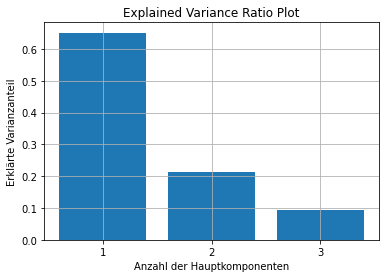

In [117]:
x_ticks = range(1, len(pca.explained_variance_ratio_) + 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, tick_label=x_ticks)
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Erklärte Varianzanteil')
plt.title('Explained Variance Ratio Plot')
plt.grid()

plt.show()

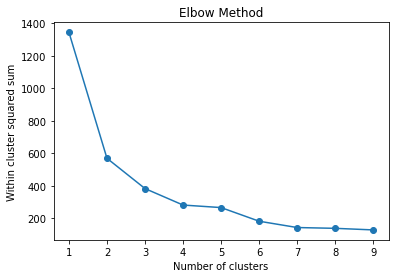

In [118]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(penguins4_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster squared sum")
plt.title("Elbow Method")
plt.show()

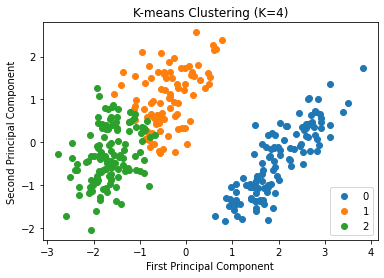

In [122]:
kmeans = KMeans(n_clusters=3, random_state=10, n_init="auto").fit(penguins4_pca)
labels = kmeans.fit_predict(penguins4_pca)
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(penguins4_pca[labels == i , 0] , penguins4_pca[labels == i , 1] , cmap="viridis", label = i)
   
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={4})")
plt.legend(loc="lower right")
plt.show()

In [123]:
labels = kmeans.labels_
metrics.silhouette_score(penguins4_pca, labels, metric='euclidean')

0.44690709200271794

# Zusammenfassung
* im Datensatz lassen sich Muster finden
* mittels k Means Clustering Analyse lassen sich bis zu 3 Cluster erklären
* PCA zur Dimensionsreduktion eingesetzt